In [ ]:
# Download the model before attempting to run this NB
# python -m spacy download en_core_web_lg

In [1]:
import matplotlib.pyplot as plt
import os
import seaborn as sns
import spacy
from spacy.gold import GoldCorpus

In [40]:
file_dir = '../data/en/combined/spacy_formatted/'
devset = 'spacy_dev_combined_std.json'
dev_path = os.path.join(file_dir, devset)

# Create a temp file (devset but with '_2' appended) and
# replace all the 'PER' tags with 'PERSON' to match spacy NER model
dev_path_2 = dev_path[:-5] + '_2' + dev_path[-5:]

with open(dev_path) as f:
    with open(dev_path_2, 'w') as f2:
        f2.write(f.read().replace('-PER', '-PERSON'))

In [57]:
nlp = spacy.load('en_core_web_lg')
gc = GoldCorpus(dev_path_2, dev_path_2)
docs = gc.train_docs(nlp)
scorer = nlp.evaluate(docs)

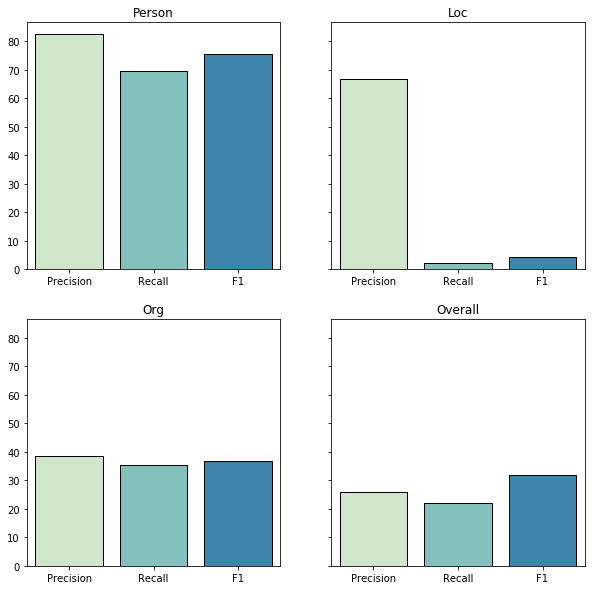

In [101]:
scores = scorer.scores['ents_per_type']
overall = scorer.scores
f, p, r = overall['ents_f'], overall['ents_p'], overall['ents_r']
x = ['Precision', 'Recall', 'F1']

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharey=True, 
                       subplot_kw={'xticklabels': x}
                      )
ax = ax.flatten()

for a, tag in zip(ax, ['PERSON', 'LOC', 'ORG', 'OVERALL']):
    
    if tag == 'OVERALL':
        y = [f, p, r]
    else: 
        y = list(scores[tag].values())
    
    sns.barplot(x=x, y=y, ax=a, palette='GnBu', edgecolor='black')
    a.set_title(str.title(tag))

### Summary
This dataset is a combination of the Emerging Entities data and the CONLL2003 data (and CONLL2003, the easier dataset, represents over 80% of the entities). 

Given that SoTA on CONLL2003 is over 95 at this point, and this is spaCy's best English model, AND that the model is trained on this specific genre of text (news and blogs), these numbers are surprising.

One thing that seems particularly odd is the extremely low recall and F1 for LOC, which is not an especially difficult tag in the NER space. I'd be curious to know if there's some kind of quirk in the scoring function that's causing this - spaCy uses BILUO tags rather than BIO tags (and exact match for scoring), so this could be too strict a criteria. 

SpaCy's reported scores for this model:

NER F 86.62

NER P 87.03

NER R 86.20

The spaCy model wasn't trained with a MISC tag, so info on the performance there is not available.

Matt Honnibal weighs in on this [here](https://github.com/explosion/spaCy/issues/2169), but he mainly talks about superficial differences (differences in labeling scheme), which have already been addressed here. He claims that it is possible to get around 92% on CONLL using the spacy model.